In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tests = 7
N = 40000

# Columnwise 

In [3]:
columnwise = pd.read_csv('./myInitializeMatrix-columnwise.csv', index_col=0)
columnwise.head()

,$index_{max}$,$max$,index_{min},min,avg
0,1.0,34.547,1.0,34.547,34.547
1,1.0,34.547,2.0,33.957,34.252
2,1.0,34.547,3.0,33.145,33.883
3,1.0,34.547,3.0,33.145,33.856
4,1.0,34.547,3.0,33.145,33.806


In [4]:
end_columnwise = columnwise.iloc[columnwise.index[(columnwise.index % tests == 0)] - 1].sort_index()
end_columnwise.index = pd.np.arange(len(end_columnwise)) + 1

In [5]:
end_columnwise['total_avg'] = end_columnwise['avg'].mean()

In [6]:
end_columnwise.head()

,$index_{max}$,$max$,index_{min},min,avg,total_avg
1,7.0,38.755,3.0,33.145,35.020,35.4792
2,1.0,36.253,5.0,35.293,35.594,35.4792
3,1.0,36.240,5.0,35.295,35.593,35.4792
4,1.0,36.206,5.0,35.153,35.588,35.4792
5,1.0,36.209,5.0,35.180,35.601,35.4792


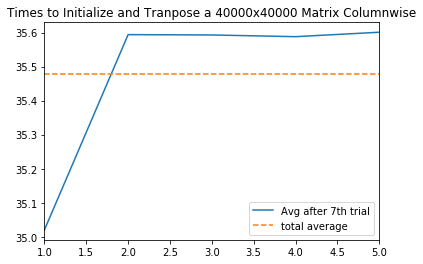

In [7]:
ax = end_columnwise['avg'].plot(legend=True, title='Times to Initialize and Tranpose a 40000x40000 Matrix Columnwise')
ax = end_columnwise['total_avg'].plot(legend=True, style=['--'])
plt.legend(['Avg after 7th trial', 'total average'])

In [8]:
end_columnwise['avg'].mean()

35.479200000000006

# Rowwise 

In [9]:
rowwise = pd.read_csv('./myInitializeMatrix-rowwise.csv', index_col=0)
rowwise.head()

,$index_{max}$,$max$,index_{min},min,avg
0,1.0,8.436,1.0,8.436,8.436
1,1.0,8.436,2.0,5.422,6.929
2,1.0,8.436,2.0,5.422,6.437
3,1.0,8.436,4.0,4.905,6.054
4,1.0,8.436,5.0,4.718,5.787


In [10]:
end_rowwise = rowwise.iloc[rowwise.index[(rowwise.index % tests == 0)] - 1].sort_index()
end_rowwise.index = pd.np.arange(len(end_rowwise)) + 1

In [11]:
end_rowwise['total_avg'] = end_rowwise['avg'].mean()

In [12]:
end_rowwise.head()

,$index_{max}$,$max$,index_{min},min,avg,total_avg
1,1.0,8.436,5.0,4.718,5.581,5.4344
2,1.0,8.265,7.0,4.778,5.425,5.4344
3,1.0,8.237,7.0,4.778,5.420,5.4344
4,1.0,8.038,7.0,4.724,5.371,5.4344
5,1.0,8.042,7.0,4.740,5.375,5.4344


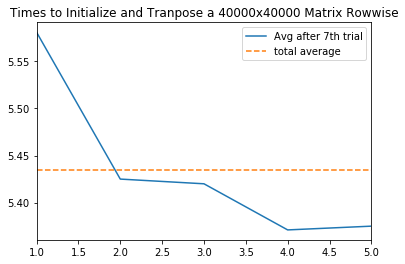

In [13]:
ax = end_rowwise['avg'].plot(legend=True, title='Times to Initialize and Tranpose a 40000x40000 Matrix Rowwise')
ax = end_rowwise['total_avg'].plot(legend=True, style=['--'])
plt.legend(['Avg after 7th trial', 'total average'])

In [14]:
end_rowwise['avg'].mean()

5.434400000000001

# Comparisons

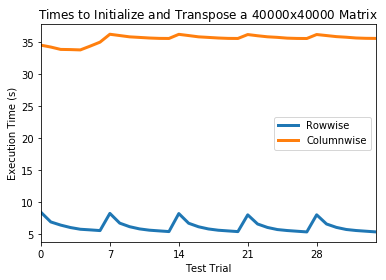

In [15]:
title = 'Times to Initialize and Transpose a ${N}$x${N}$ Matrix'
rowwise['avg'].plot(title=title.format(N=N), legend=True, lw=3)
ax = columnwise['avg'].plot(legend=True, lw=3)
ax.legend(['Rowwise', 'Columnwise'])
ax.set_xlabel('Test Trial')
ax.set_ylabel('Execution Time (s)')
_ = ax.set_xticks(7 * (pd.np.arange(len(end_rowwise))))

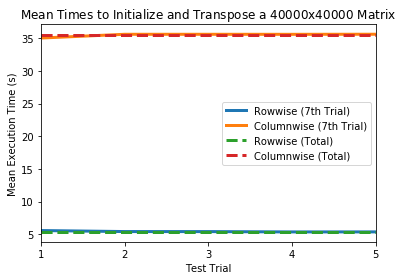

In [17]:
title = 'Mean Times to Initialize and Transpose a ${N}$x${N}$ Matrix'
end_rowwise['avg'].plot(title=title.format(N=N), legend=True, lw=3)
ax = end_columnwise['avg'].plot(legend=True, lw=3)

ax.set_xlabel('Test Trial')
ax.set_ylabel('Mean Execution Time (s)')

ax = end_rowwise['total_avg'].plot(legend=True, style=['--'], lw=3)
ax = end_columnwise['total_avg'].plot(legend=True, style=['--'], lw=3)
ax.legend(['Rowwise (7th Trial)', 'Columnwise (7th Trial)', 'Rowwise (Total)', 'Columnwise (Total)'])

_ = ax.set_xticks(pd.np.arange(len(end_rowwise)) + 1)